<a href="https://colab.research.google.com/github/SoheliPaul/Machine-Learning/blob/main/Lab9_2348561.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path='/content/drive/MyDrive/ML/Training'

In [4]:
classes={'glioma_tumor':0,'meningioma_tumor':1,'no_tumor':2,'pituitary_tumor':3}

In [5]:
X=[]
Y=[]
for cls in classes:
  pth=os.path.join(path,cls)
  for j in os.listdir(pth):
    img=cv2.imread(os.path.join(pth,j),0)
    img=cv2.resize(img,(200,200))
    X.append(img)
    Y.append(classes[cls])

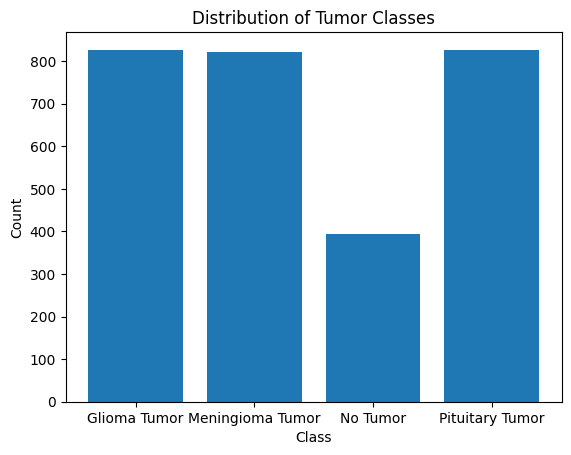

In [10]:
# Create a bar plot
class_counts = np.bincount(Y)

# Define class labels for better visualization
class_labels = ['Glioma Tumor', 'Meningioma Tumor', 'No Tumor', 'Pituitary Tumor']

# Create a bar plot
plt.bar(class_labels, class_counts)

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Tumor Classes')

# Show the plot
plt.show()

In [11]:
np.unique(Y)

array([0, 1, 2, 3])

In [12]:
pd.Series(Y).value_counts()

3    827
0    826
1    822
2    395
dtype: int64

In [13]:
X = np.array(X)
Y = np.array(Y)

In [14]:
X_updated = X.reshape(len(X), -1)

In [15]:
X.shape, X_updated.shape

((2870, 200, 200), (2870, 40000))

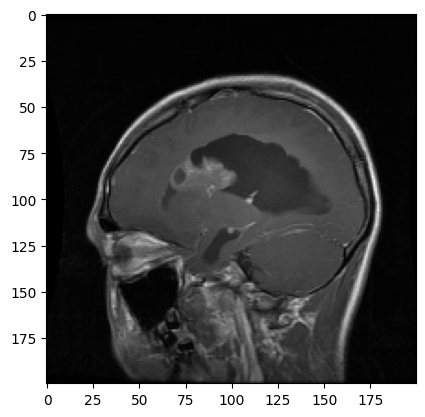

In [16]:
plt.imshow(X[1], cmap='gray')

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [18]:
xtrain.shape, xtest.shape

((2296, 40000), (574, 40000))

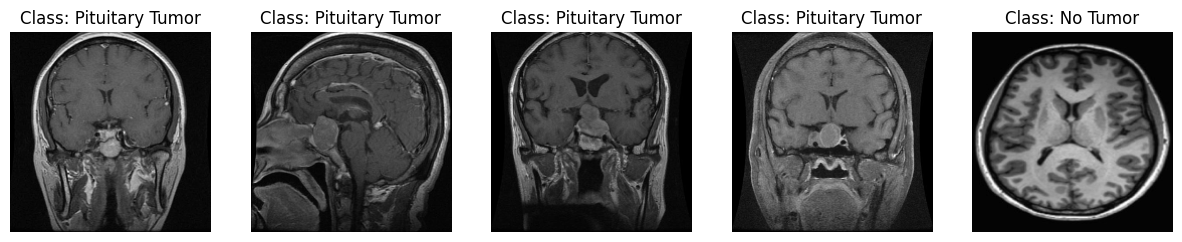

In [22]:
num_examples_to_visualize = 5
selected_indices = np.random.choice(len(X), num_examples_to_visualize, replace=False)

# Plot the selected examples
fig, axes = plt.subplots(1, num_examples_to_visualize, figsize=(15, 3))

for i, idx in enumerate(selected_indices):
    example_image = X[idx].reshape((200, 200))  # Assuming you know the original image dimensions
    class_label = class_labels[Y[idx]]  # Assuming 'y' contains class indices

    axes[i].imshow(example_image, cmap='gray')
    axes[i].set_title(f"Class: {class_label}")
    axes[i].axis('off')

plt.show()

In [19]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [20]:
from sklearn.svm import SVC

In [21]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

In [17]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.938588850174216
Testing Score: 0.8031358885017421


In [18]:
pred = sv.predict(xtest)

In [19]:
misclassified=np.where(ytest!=pred)
misclassified

(array([  0,   1,   6,  11,  22,  33,  37,  38,  40,  42,  45,  50,  56,
         57,  62,  64,  66,  71,  75,  78,  87,  91,  93,  96,  98, 111,
        114, 116, 118, 120, 133, 138, 158, 168, 170, 175, 181, 184, 186,
        192, 201, 203, 204, 208, 213, 215, 220, 223, 224, 226, 229, 241,
        245, 247, 252, 254, 272, 281, 285, 290, 291, 293, 303, 316, 318,
        319, 323, 326, 328, 342, 344, 348, 349, 354, 363, 368, 379, 387,
        391, 392, 396, 403, 409, 410, 411, 413, 417, 424, 426, 437, 447,
        454, 472, 473, 474, 475, 476, 480, 482, 499, 500, 504, 507, 512,
        522, 523, 540, 550, 552, 554, 556, 561, 569]),)

In [20]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[81],ytest[81])

Total Misclassified Samples:  113
2 2


In [23]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

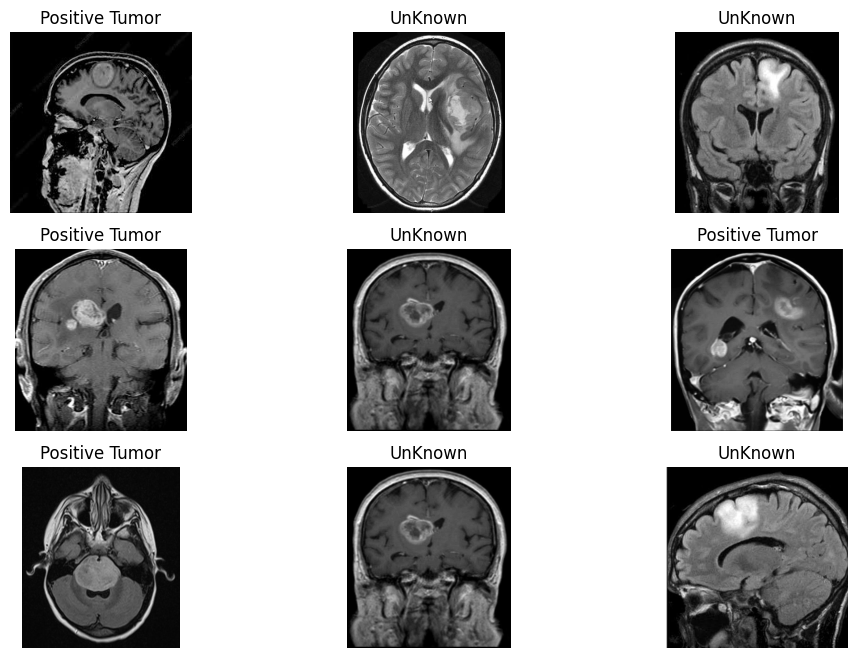

In [26]:
plt.figure(figsize=(12,8))
c=1
path='/content/drive/MyDrive/ML/Testing/glioma_tumor'
for i in os.listdir(path)[:9]:
  img=cv2.imread(os.path.join(path,i),0)
  if img is not None:
    p=sv.predict(cv2.resize(img,(200,200)).reshape(1,-1)/255)
    plt.subplot(3,3,c)
    plt.title(dec.get(p[0],'UnKnown'))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1
  else:
    print(f"Fail to load image:{i}")
    plt.show()

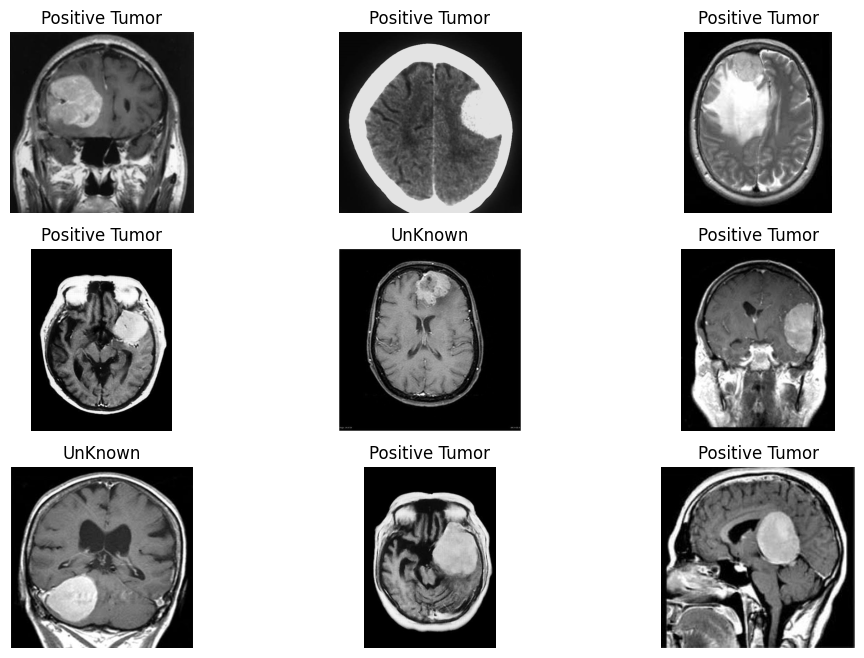

In [27]:
plt.figure(figsize=(12,8))
c=1
path='/content/drive/MyDrive/ML/Testing/meningioma_tumor'
for i in os.listdir(path)[:9]:
  img=cv2.imread(os.path.join(path,i),0)
  if img is not None:
    p=sv.predict(cv2.resize(img,(200,200)).reshape(1,-1)/255)
    plt.subplot(3,3,c)
    plt.title(dec.get(p[0],'UnKnown'))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1
  else:
    print(f"Fail to load image:{i}")
    plt.show()

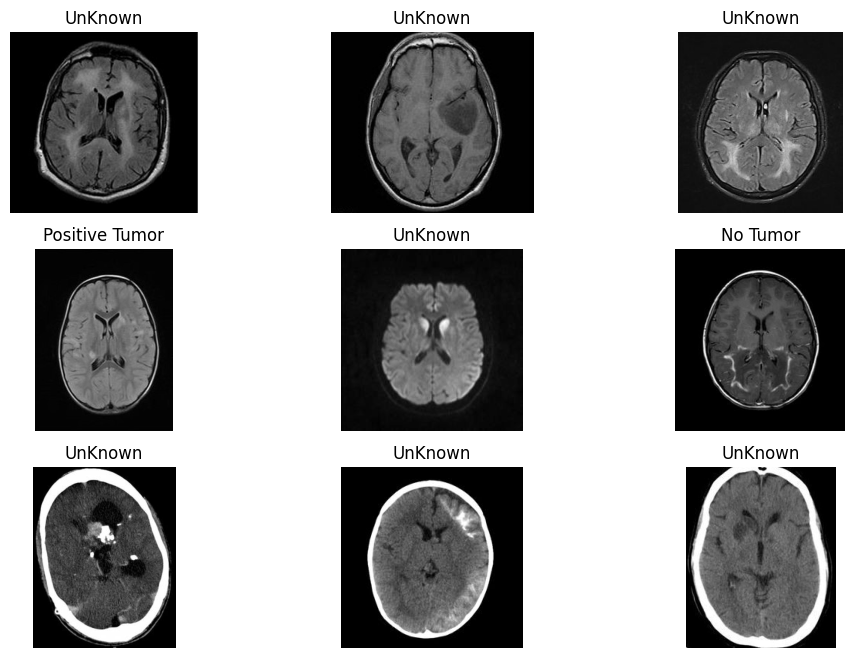

In [28]:
plt.figure(figsize=(12,8))
c=1
path='/content/drive/MyDrive/ML/Testing/no_tumor'
for i in os.listdir(path)[:9]:
  img=cv2.imread(os.path.join(path,i),0)
  if img is not None:
    p=sv.predict(cv2.resize(img,(200,200)).reshape(1,-1)/255)
    plt.subplot(3,3,c)
    plt.title(dec.get(p[0],'UnKnown'))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1
  else:
    print(f"Fail to load image:{i}")
    plt.show()

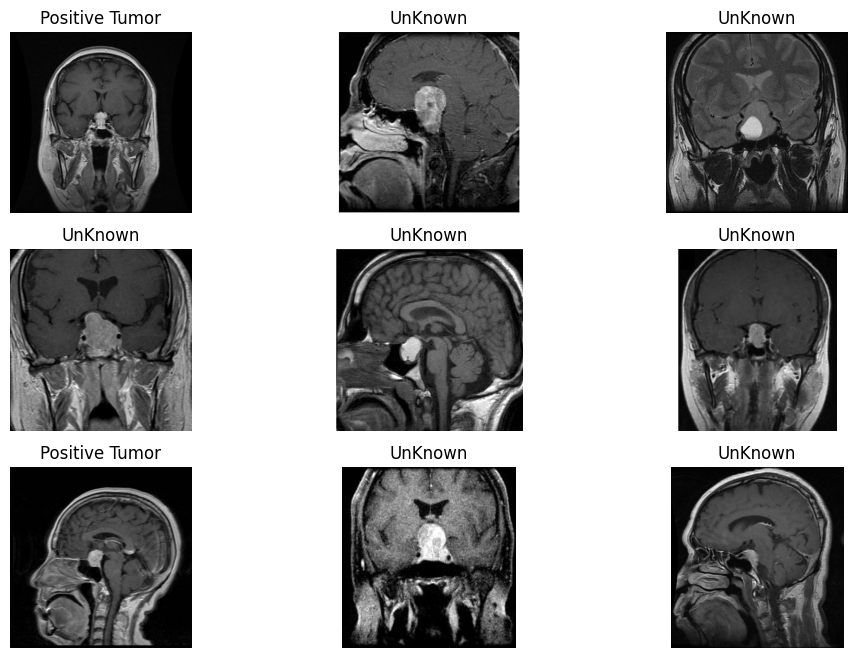

In [29]:
plt.figure(figsize=(12,8))
c=1
path='/content/drive/MyDrive/ML/Testing/pituitary_tumor'
for i in os.listdir(path)[:9]:
  img=cv2.imread(os.path.join(path,i),0)
  if img is not None:
    p=sv.predict(cv2.resize(img,(200,200)).reshape(1,-1)/255)
    plt.subplot(3,3,c)
    plt.title(dec.get(p[0],'UnKnown'))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1
  else:
    print(f"Fail to load image:{i}")
    plt.show()